In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [195]:
trans_data = pd.read_csv("/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/csv/lightning_logs/version_2/metrics.csv")
#trans_data = trans_data[trans_data.epoch<42]
#trans_data = trans_data[trans_data.epoch<50]
trans_val = trans_data.dropna(subset = ['val_loss'])
trans_train = trans_data.dropna(subset = ['train_loss'])
trans_epoch = trans_train["epoch"]  
trans_train_loss = trans_train["train_loss"]
trans_val_loss = trans_val["val_loss"]
trans_train_acc = trans_train["train_acc"]
trans_val_acc = trans_val["val_acc"]
trans_epi_data = pd.read_csv("/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_20230905_h512_l12_lr1e-5_wo_seq/csv/lightning_logs/version_1/metrics.csv")
#trans_epi_data = trans_epi_data[trans_epi_data.epoch<42]
trans_epi_val = trans_epi_data.dropna(subset = ['val_loss'])
trans_epi_train = trans_epi_data.dropna(subset = ['train_loss'])
trans_epi_epoch = trans_epi_train["epoch"]  
trans_epi_train_loss = trans_epi_train["train_loss"]
trans_epi_val_loss = trans_epi_val["val_loss"]
trans_epi_train_acc = trans_epi_train["train_acc"]
trans_epi_val_acc = trans_epi_val["val_acc"]

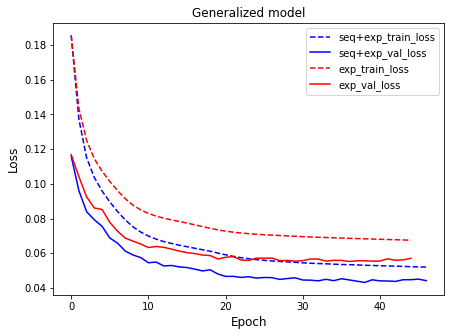

In [17]:
fig = plt.figure(figsize = (7,5)) 
p1 = plt.plot(trans_epoch, trans_train_loss,color ="b" , linestyle = '--',label = u'seq+exp_train_loss')
p2 = plt.plot(trans_epoch,trans_val_loss, color ="b" , label = u'seq+exp_val_loss')
#p3 = pl.plot(trans_seq_epoch, trans_seq_train_loss,'b--', linestyle = '--',label = u'seq_train_loss')
#p4 = pl.plot(trans_seq_epoch,trans_seq_val_loss, 'b-', label = u'seq_val_loss')
p5 = plt.plot(trans_epi_epoch, trans_epi_train_loss, color ="r" , linestyle = '--',label = u'exp_train_loss')
p6 = plt.plot(trans_epi_epoch,trans_epi_val_loss, color ="r", label = u'exp_val_loss')
plt.legend()
plt.xlabel(u'Epoch',fontsize=12)
plt.ylabel(u'Loss',fontsize=12)
plt.title('Generalized model')
plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig2/Epoch_loss.pdf', format='pdf')

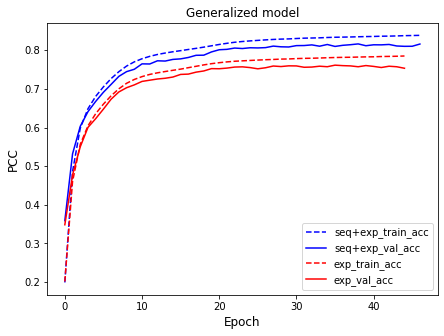

In [18]:
fig = plt.figure(figsize = (7,5)) 
p1 = pl.plot(trans_epoch, trans_train_acc,'b', linestyle = '--',label = u'seq+exp_train_acc')
p2 = pl.plot(trans_epoch,trans_val_acc, 'b', label = u'seq+exp_val_acc')
#p3 = pl.plot(trans_seq_epoch, trans_seq_train_acc,'b--', linestyle = '--',label = u'seq_train_acc')
#p4 = pl.plot(trans_seq_epoch,trans_seq_val_acc, 'b-', label = u'seq_val_acc')
p5 = pl.plot(trans_epi_epoch, trans_epi_train_acc,'r', linestyle = '--',label = u'exp_train_acc')
p6 = pl.plot(trans_epi_epoch,trans_epi_val_acc, 'r', label = u'exp_val_acc')
pl.legend()
pl.xlabel(u'Epoch',fontsize=12)
pl.ylabel(u'PCC',fontsize=12)
plt.title('Generalized model')
plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig2/Epoch_pcc.pdf', format='pdf')

In [ ]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
bed_file = '/data/slurm/hejl/riboseq/mutation/start_codon_unique.bed'
# 读取fasta文件
fasta = Fasta(fasta_file)
start_codons = []

with open(bed_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split('\t')
        start = int(start)
        end = int(end)

        # 获取start_codon的序列
        sequence = fasta[chrom][start-4:end+1].seq
        if len(sequence)!=7:
            continue
        if sequence[3:6]!='ATG':
            continue
        if sequence[0]=='C' and sequence[6] == 'G':
            start_codons.append((chrom, start, end))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_C.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in start_codons:
        writer.writerow(site)


In [ ]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
bed_file = '/data/slurm/hejl/riboseq/mutation/start_codon_unique.bed'
# 读取fasta文件
fasta = Fasta(fasta_file)
start_codons = []

with open(bed_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split('\t')
        start = int(start)
        end = int(end)

        # 获取start_codon的序列
        sequence = fasta[chrom][start-4:end+1].seq
        if len(sequence)!=7:
            continue
        if sequence[3:6]!='ATG':
            continue
        if sequence[0]=='T' and sequence[6] == 'G':
            start_codons.append((chrom, start, end))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_T.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in start_codons:
        writer.writerow(site)


**

In [8]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
pos_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_A.csv' #pos8=A的chr,start,end信息
# 读取fasta文件
fasta = Fasta(fasta_file)
selected_sites = []

with open(pos_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split(',')
        start = int(start)
        end = int(end)

        # 获取start_codon上下游20bp的序列
        sequence = fasta[chrom][start-21:end+20].seq
        if len(sequence)!=43:
            continue
        if sequence[20:23]!='ATG':
            continue
        for i in range(5,15):
            if sequence[i] == "A":
                position = start - (20-i)
                selected_sites.append((chrom, position))
        for i in range(28,38):
            if sequence[i] == "A":
                position = end + (i-22)
                selected_sites.append((chrom, position))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_neg_A.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in selected_sites:
        writer.writerow(site)


In [10]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
pos_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_G.csv' #pos8=A的chr,start,end信息
# 读取fasta文件
fasta = Fasta(fasta_file)
selected_sites = []

with open(pos_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split(',')
        start = int(start)
        end = int(end)

        # 获取start_codon上下游20bp的序列
        sequence = fasta[chrom][start-21:end+20].seq
        if len(sequence)!=43:
            continue
        if sequence[20:23]!='ATG':
            continue
        for i in range(5,15):
            if sequence[i] == "G":
                position = start - (20-i)
                selected_sites.append((chrom, position))
        for i in range(28,38):
            if sequence[i] == "G":
                position = end + (i-22)
                selected_sites.append((chrom, position))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_neg_G.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in selected_sites:
        writer.writerow(site)


In [11]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
pos_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_C.csv' #pos8=A的chr,start,end信息
# 读取fasta文件
fasta = Fasta(fasta_file)
selected_sites = []

with open(pos_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split(',')
        start = int(start)
        end = int(end)

        # 获取start_codon上下游20bp的序列
        sequence = fasta[chrom][start-21:end+20].seq
        if len(sequence)!=43:
            continue
        if sequence[20:23]!='ATG':
            continue
        for i in range(5,15):
            if sequence[i] == "C":
                position = start - (20-i)
                selected_sites.append((chrom, position))
        for i in range(28,38):
            if sequence[i] == "C":
                position = end + (i-22)
                selected_sites.append((chrom, position))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_neg_C.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in selected_sites:
        writer.writerow(site)


In [12]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
pos_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_T.csv' #pos8=A的chr,start,end信息
# 读取fasta文件
fasta = Fasta(fasta_file)
selected_sites = []

with open(pos_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split(',')
        start = int(start)
        end = int(end)

        # 获取start_codon上下游20bp的序列
        sequence = fasta[chrom][start-21:end+20].seq
        if len(sequence)!=43:
            continue
        if sequence[20:23]!='ATG':
            continue
        for i in range(5,15):
            if sequence[i] == "T":
                position = start - (20-i)
                selected_sites.append((chrom, position))
        for i in range(28,38):
            if sequence[i] == "T":
                position = end + (i-22)
                selected_sites.append((chrom, position))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_neg_T.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in selected_sites:
        writer.writerow(site)


In [13]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
pos_file = '/data/slurm/hejl/riboseq/mutation/results/kozak_sites_pos14_G.csv' #pos14=G的chr,start,end信息
# 读取fasta文件
fasta = Fasta(fasta_file)
selected_sites = []

with open(pos_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split(',')
        start = int(start)
        end = int(end)

        # 获取start_codon上下游20bp的序列
        sequence = fasta[chrom][start-21:end+20].seq
        if len(sequence)!=43:
            continue
        if sequence[20:23]!='ATG':
            continue
        for i in range(5,15):
            if sequence[i] == "G":
                position = start - (20-i)
                selected_sites.append((chrom, position))
        for i in range(28,38):
            if sequence[i] == "G":
                position = end + (i-22)
                selected_sites.append((chrom, position))

output_file = '/data/slurm/hejl/riboseq/mutation/kozak_sites_pos14_neg_G.csv'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for site in selected_sites:
        writer.writerow(site)


***

In [ ]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.contains(gene_name)]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                       if gene_info['start'] <= snp_position <= gene_info['end']), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom']
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(interval, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = interval.chrom
    start = interval.start
    end = interval.end
    chromosome_length = bw.chroms(chrom)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(interval, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = interval.chrom
    start = interval.start
    end = interval.end
    chromosome_length = bw.chroms(chrom)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'EPCAM'
gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval.resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(region_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)

pred = model(reference_input)[0].detach().cpu().numpy()

gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).unsqueeze(1).to(device)
#
tracks = {'Prediction': pred,
          'Ground Truth': gt
          }

plot_tracks(tracks, region_interval, height=1)

corr = pearsonr(pred,gt)
print('Pearson: ')
print(corr)



import pyBigWig
index = [0, 1]
#挑选2个targets查看

tracks = {}
for i in index:
    row = targets.iloc[i]
    tracks['pred_'+row['identifier']] = predictions[:, i]
    with pyBigWig.open(row.file) as bw:
        gt = bw.stats(
                target_interval.chrom, 
                max(target_interval.start, 0),
                target_interval.end,
                # min(target_interval.end, chromosome_length), 
                nBins=896)
        tracks['gt_'+row['identifier']] = gt
        
plot_tracks(tracks, target_interval)


# NOC2L
seq, features, mat, start, end, chr_name, chr_idx = testdata[4]
features = torch.tensor(np.nan_to_num(features, 0))
seq = torch.tensor(seq).unsqueeze(0) 
features = torch.cat([feat.unsqueeze(0).unsqueeze(2) for feat in features], dim = 2)
inputs = torch.cat([seq, features], dim = 2)
inputs = inputs.to(device)
pred = model(inputs)[0].detach().cpu().numpy()
mat = mat.numpy()
pcc = np.corrcoef(pred, mat)[0,1]
pcc
tracks = {}
tracks['Prediction'] = pred
tracks['Ground Truth'] = mat


region = ['chr2',47345158,47387601]
target_interval = kipoiseq.Interval(*region).resize(65536)
plot_tracks(tracks, target_interval)


from scipy.stats import pearsonr
print('Pearson: ')
print(variant_sum)
print(gene_info)
pearsonr(pred,mat)

In [ ]:

#variant = kipoiseq.Variant(chrom = 'chr10', pos = 5867238,ref = 'C', alt= 'A')  # @param
#variant = kipoiseq.Variant(chrom = 'chr17', pos = 43399730, ref = 'A', alt= 'T')

gene_interval =kipoiseq.Interval(variant.chrom, gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval.resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(region_interval)
tmp_seq = ref_seq
alt_loc = variant.pos - region_interval.start -1
if ref_seq[alt_loc] == variant.ref:
    alt_seq = ref_seq[:alt_loc] + variant.alt + ref_seq[alt_loc+1:]
    ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)
    alt_emb = torch.Tensor(one_hot_encode(alt_seq)).to(device)
    epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
    reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
    alternate_input = torch.cat([alt_emb, epi], dim = 1).unsqueeze(0)

    reference_prediction = model(reference_input)[0].detach().cpu().numpy()
    alternate_prediction = model(alternate_input)[0].detach().cpu().numpy()
    
    variant_scores = alternate_prediction - reference_prediction
    
    cds_values = []
    # extract values in CDS intervals
    for cds_interval in gene_info['cds_intervals']:
        istart = int(math.floor((cds_interval[0]- region_interval.start)/64))
        iend = int(math.ceil((cds_interval[1]- region_interval.start)/64))
        values = np.array(variant_scores[istart:iend], dtype = np.float32)
        cds_values.extend(values)
    variant_sum = np.sum(np.array(cds_values), dtype = np.float32)
    
    variant_track = np.zeros_like(reference_prediction[:], dtype=bool)
    variant_track[int(math.floor((variant.pos- region_interval.start)/64))] = True

tracks = {'variant': variant_track,
          'ref': reference_prediction[:],
          'alt': alternate_prediction[:],
          'alt-ref': alternate_prediction[:] - reference_prediction[:]
          }

plot_tracks(tracks, region_interval, height=1)
print('variant score (by cds): ')
print(variant_sum)
print(gene_info)

In [52]:
from scipy.stats import pearsonr
a = [1,4,6]
b = [1,2,3]
corr, p = pearsonr(a,b)
print(corr)

0.9933992677987827


Initializing TransModel
Pearson(Epithelial): 
0.7582934234873243
Pearson(hTERT-RPE1): 
0.7749550256763823
Pearson(Prostate): 
0.6415945965057264
Pearson(RD): 
0.615628346833261


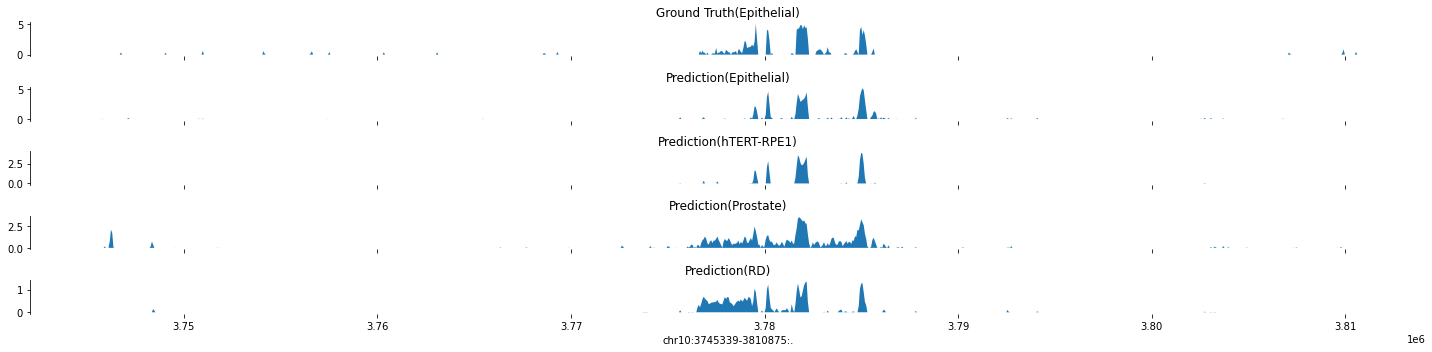

In [27]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'KLF6'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth(Epithelial)': gt,
          'Prediction(Epithelial)': pred,          
          'Prediction(hTERT-RPE1)': pred_t2,
          'Prediction(Prostate)': pred_t1,
          'Prediction(RD)': pred_t3,
          }

plot_tracks(tracks, target_interval, height=1) #

idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

correlation, p_value = pearsonr(pred[idx_start:idx_end],gt[idx_start:idx_end])
correlation1, p_value1 = pearsonr(pred_t1[idx_start:idx_end],gt[idx_start:idx_end])
correlation2, p_value2 = pearsonr(pred_t2[idx_start:idx_end],gt[idx_start:idx_end])
correlation3, p_value3 = pearsonr(pred_t3[idx_start:idx_end],gt[idx_start:idx_end])
print('Pearson(Epithelial): ')
print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

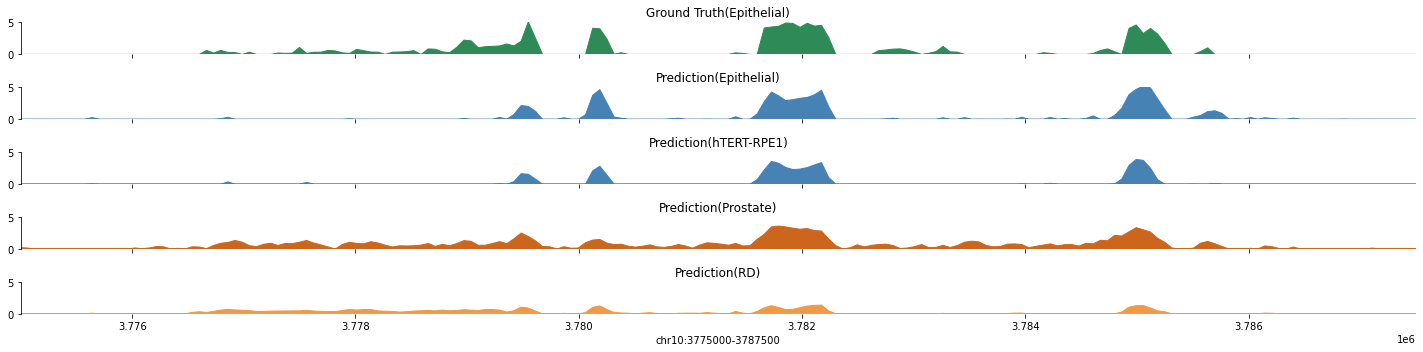

In [30]:
# 定义每个轨道对应的颜色
colors = {'Ground Truth(Epithelial)': '#2E8B57',
          'Prediction(Epithelial)': '#4682B4',
          'Prediction(hTERT-RPE1)': '#4682B4',
          'Prediction(Prostate)': '#CD661D',
          'Prediction(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 5)
        ax.set_xlim(3775000, 3787500)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr10:3775000-3787500")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig4/KLF6_3775000-3787500.pdf')
plot_tracks(tracks, target_interval, height=1)

Initializing TransModel
Pearson(hTERT-RPE1): 
0.9158538489201278
Pearson(Prostate): 
0.8489632114882476
Pearson(RD): 
0.9477985555949943


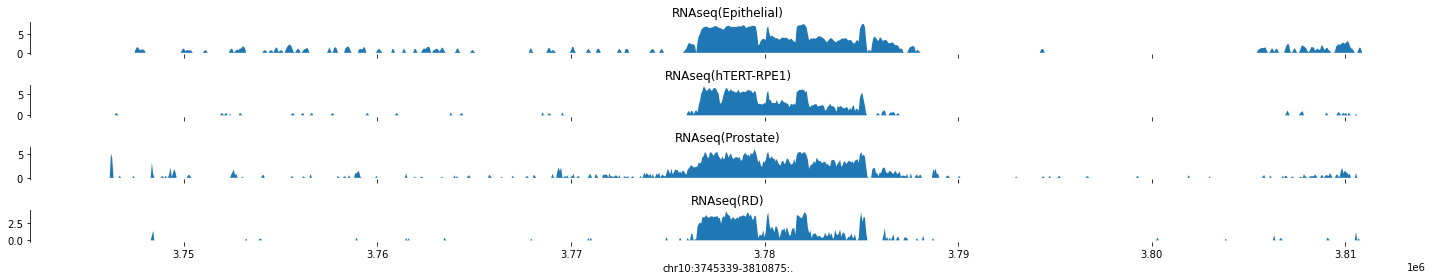

In [35]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'KLF6'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()

rna = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file)[0]).cpu().numpy()
rna1 = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file_t1)[0]).cpu().numpy()
rna2 = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file_t2)[0]).cpu().numpy()
rna3 = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file_t3)[0]).cpu().numpy()

#
tracks = {'RNAseq(Epithelial)': rna,          
          'RNAseq(hTERT-RPE1)': rna2,
          'RNAseq(Prostate)': rna1,
          'RNAseq(RD)': rna3,
          }

plot_tracks(tracks, target_interval, height=1) #

idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

correlation1, p_value1 = pearsonr(rna1[idx_start:idx_end],rna[idx_start:idx_end])
correlation2, p_value2 = pearsonr(rna2[idx_start:idx_end],rna[idx_start:idx_end])
correlation3, p_value3 = pearsonr(rna3[idx_start:idx_end],rna[idx_start:idx_end])

#print('Pearson(Epithelial): ')
#print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

In [41]:
a = [2,4,6,8,10]
b = [4,8,12,16,20]
pearsonr(a,b)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [43]:
a = [2,4,6,8,10]
b = [1.8,3.9,6.2,7.5,10.1]
pearsonr(a,b)

PearsonRResult(statistic=0.99639251980732, pvalue=0.0002599588724241198)

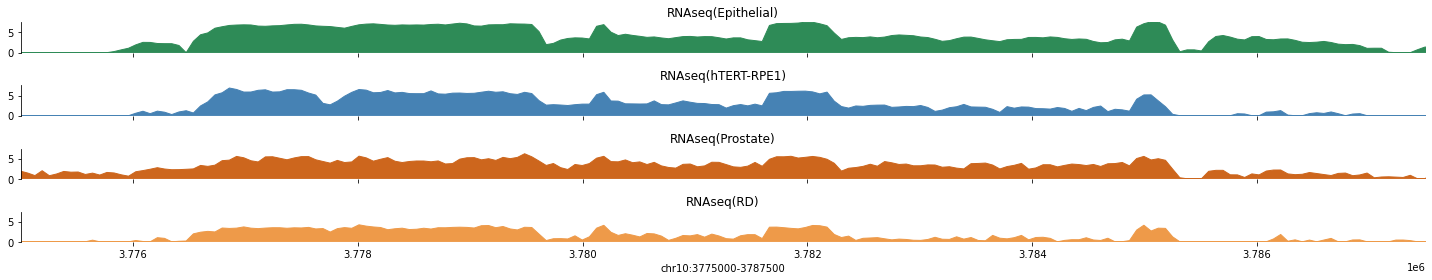

In [36]:
# 定义每个轨道对应的颜色
colors = {'RNAseq(Epithelial)': '#2E8B57',
          'RNAseq(hTERT-RPE1)': '#4682B4',
          'RNAseq(Prostate)': '#CD661D',
          'RNAseq(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 7.5)
        ax.set_xlim(3775000, 3787500)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr10:3775000-3787500")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig4/KLF6_rna.scaled.pdf')
plot_tracks(tracks, target_interval, height=1)

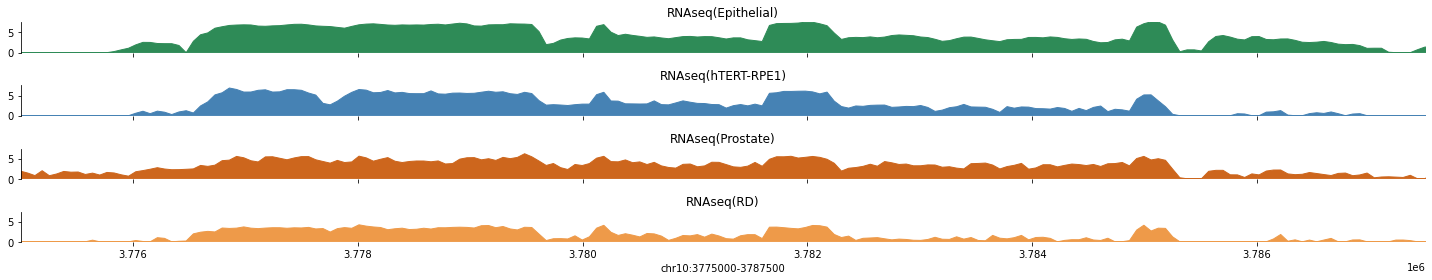

In [32]:
# 定义每个轨道对应的颜色
colors = {'RNAseq(Epithelial)': '#2E8B57',
          'RNAseq(hTERT-RPE1)': '#4682B4',
          'RNAseq(Prostate)': '#CD661D',
          'RNAseq(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 7.5)
        ax.set_xlim(3775000, 3787500)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr10:3775000-3787500")
    plt.tight_layout()
    #plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig4/KLF6_rna.pdf')
plot_tracks(tracks, target_interval, height=1)

In [202]:
gene_interval

Interval(chrom='chr10', start=3775996, end=3780217, name='', strand='.', ...)

In [203]:
region_interval

Interval(chrom='chr10', start=3775996, end=3780217, name='', strand='.', ...)

In [204]:
target_interval

Interval(chrom='chr10', start=3745339, end=3810875, name='', strand='.', ...)

Initializing TransModel
Pearson(hTERT-RPE1): 
0.7864303212189895
Pearson(Prostate): 
0.7887793863752669
Pearson(RD): 
0.78789926970168


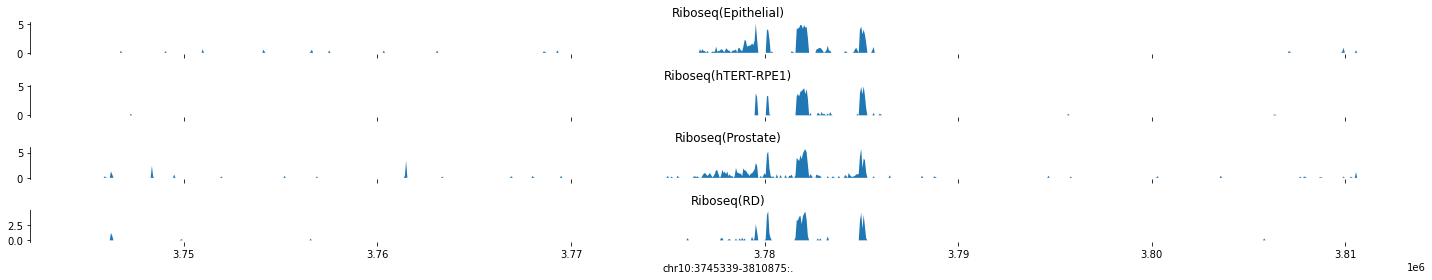

In [1]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

ribo_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/output_features/riboseq.bw'
ribo_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/output_features/riboseq.bw'
ribo_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/output_features/riboseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'KLF6'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()

#rna = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).cpu().numpy()
gt1 = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file_t1)[0]).cpu().numpy()
gt2 = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file_t2)[0]).cpu().numpy()
gt3 = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file_t3)[0]).cpu().numpy()

#
tracks = {'Riboseq(Epithelial)': gt,          
          'Riboseq(hTERT-RPE1)': gt2,
          'Riboseq(Prostate)': gt1,
          'Riboseq(RD)': gt3,
          }

plot_tracks(tracks, target_interval, height=1) #

idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

correlation1, p_value1 = pearsonr(gt1[idx_start:idx_end],gt[idx_start:idx_end])
correlation2, p_value2 = pearsonr(gt2[idx_start:idx_end],gt[idx_start:idx_end])
correlation3, p_value3 = pearsonr(gt3[idx_start:idx_end],gt[idx_start:idx_end])
#print('Pearson(Epithelial): ')
#print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

In [4]:
gene_interval

Interval(chrom='chr10', start=3775996, end=3780217, name='', strand='.', ...)

In [5]:
target_interval

Interval(chrom='chr10', start=3745339, end=3810875, name='', strand='.', ...)

In [ ]:
idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

In [2]:
idx_start

479

In [3]:
idx_end

544

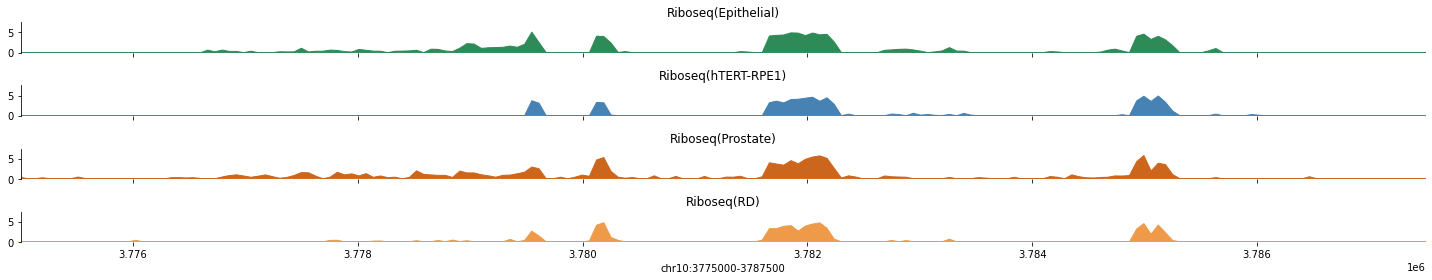

In [46]:
# 定义每个轨道对应的颜色
colors = {'Riboseq(Epithelial)': '#2E8B57',
          'Riboseq(hTERT-RPE1)': '#4682B4',
          'Riboseq(Prostate)': '#CD661D',
          'Riboseq(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 7.5)
        ax.set_xlim(3775000, 3787500)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr10:3775000-3787500")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig4/KLF6_riboseq.pdf')
plot_tracks(tracks, target_interval, height=1)

Initializing TransModel
Pearson(Epithelial): 
0.8581478142986172
Pearson(hTERT-RPE1): 
0.8455865122911307
Pearson(Prostate): 
0.8083477051428285
Pearson(RD): 
0.8270952213159891


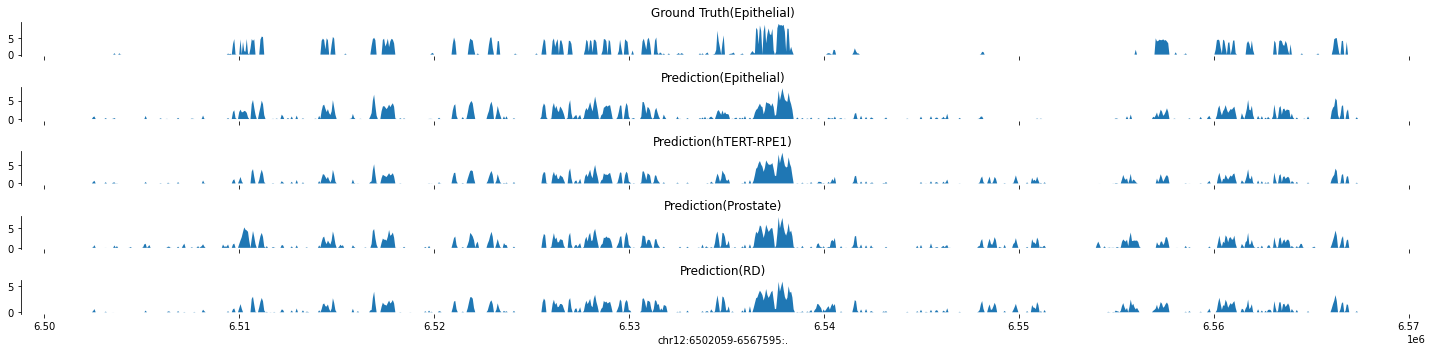

In [210]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'GAPDH'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth(Epithelial)': gt,
          'Prediction(Epithelial)': pred,          
          'Prediction(hTERT-RPE1)': pred_t2,
          'Prediction(Prostate)': pred_t1,
          'Prediction(RD)': pred_t3,
          }

plot_tracks(tracks, target_interval, height=1) #

correlation, p_value = pearsonr(pred,gt)
correlation1, p_value1 = pearsonr(pred_t1,gt)
correlation2, p_value2 = pearsonr(pred_t2,gt)
correlation3, p_value3 = pearsonr(pred_t3,gt)
print('Pearson(Epithelial): ')
print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

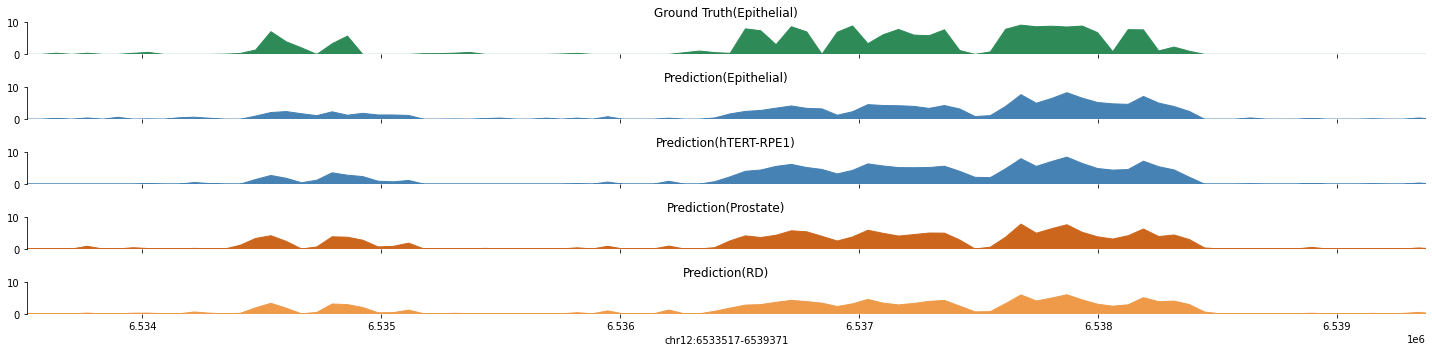

In [214]:
# 定义每个轨道对应的颜色
colors = {'Ground Truth(Epithelial)': '#2E8B57',
          'Prediction(Epithelial)': '#4682B4',
          'Prediction(hTERT-RPE1)': '#4682B4',
          'Prediction(Prostate)': '#CD661D',
          'Prediction(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 10)
        ax.set_xlim(6533517, 6539371)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr12:6533517-6539371")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/FigS4/GAPDH.pdf')
plot_tracks(tracks, target_interval, height=1)


Initializing TransModel
Pearson(Epithelial): 
0.9098907437929508
Pearson(hTERT-RPE1): 
0.8862088031838973
Pearson(Prostate): 
0.8972993733430663
Pearson(RD): 
0.8818167343128676


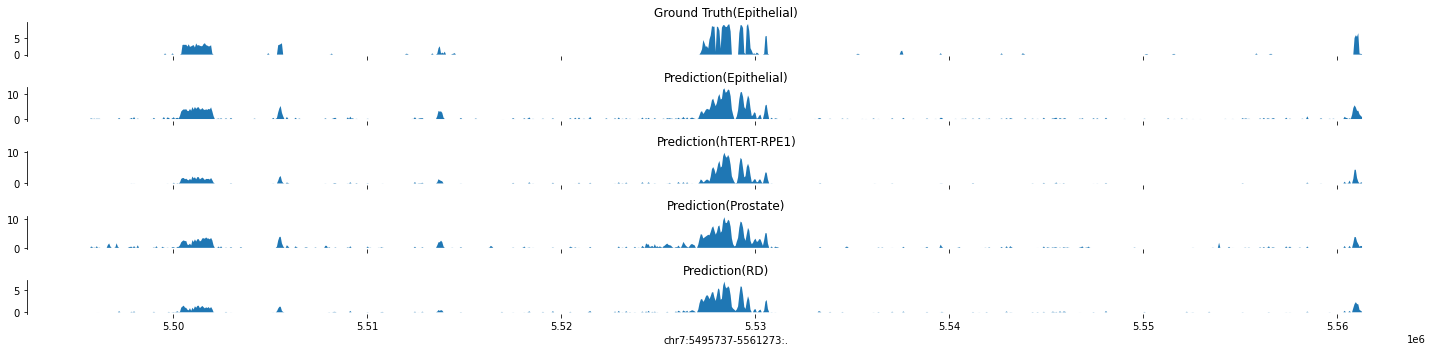

In [19]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'ACTB'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth(Epithelial)': gt,
          'Prediction(Epithelial)': pred,          
          'Prediction(hTERT-RPE1)': pred_t2,
          'Prediction(Prostate)': pred_t1,
          'Prediction(RD)': pred_t3,
          }

plot_tracks(tracks, target_interval, height=1) #

idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

correlation, p_value = pearsonr(pred[idx_start:idx_end],gt[idx_start:idx_end])
correlation1, p_value1 = pearsonr(pred_t1[idx_start:idx_end],gt[idx_start:idx_end])
correlation2, p_value2 = pearsonr(pred_t2[idx_start:idx_end],gt[idx_start:idx_end])
correlation3, p_value3 = pearsonr(pred_t3[idx_start:idx_end],gt[idx_start:idx_end])
print('Pearson(Epithelial): ')
print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

In [18]:
idx_end

34864

In [13]:
gene_interval

Interval(chrom='chr7', start=5526409, end=5530601, name='', strand='.', ...)

In [15]:
target_interval

Interval(chrom='chr7', start=5495737, end=5561273, name='', strand='.', ...)

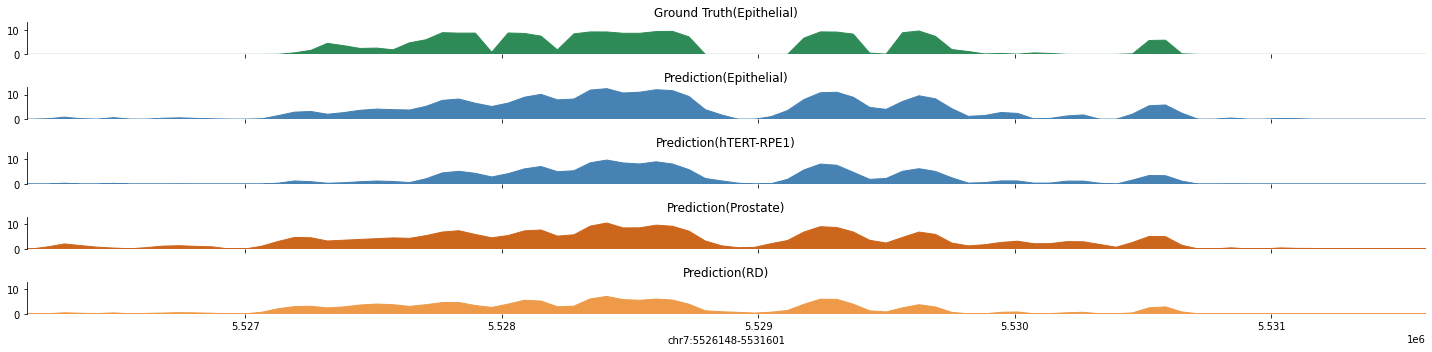

In [218]:
# 定义每个轨道对应的颜色
colors = {'Ground Truth(Epithelial)': '#2E8B57',
          'Prediction(Epithelial)': '#4682B4',
          'Prediction(hTERT-RPE1)': '#4682B4',
          'Prediction(Prostate)': '#CD661D',
          'Prediction(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 13)
        ax.set_xlim(5526148, 5531601)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr7:5526148-5531601")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/FigS4/ACTB.pdf')
plot_tracks(tracks, target_interval, height=1)


Initializing TransModel
Pearson(hTERT-RPE1): 
0.9769529599001511
Pearson(Prostate): 
0.9562745958088033
Pearson(RD): 
0.9736549735913861


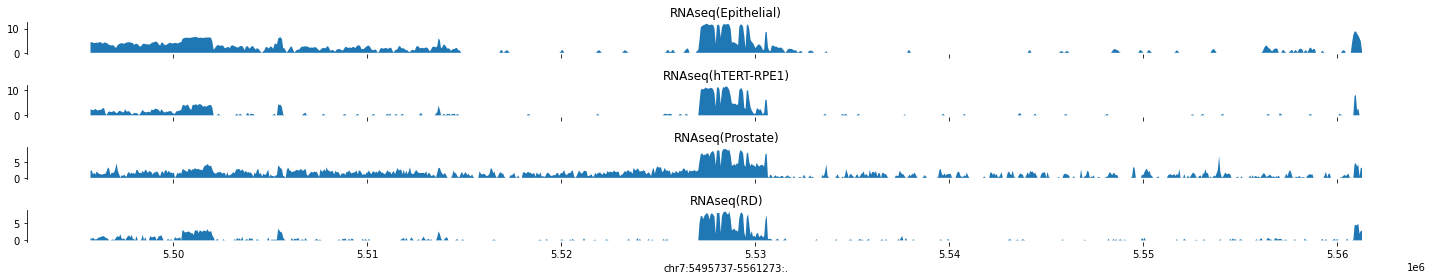

In [20]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'ACTB'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()

rna = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file)[0]).cpu().numpy()
rna1 = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file_t1)[0]).cpu().numpy()
rna2 = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file_t2)[0]).cpu().numpy() #这里为了方便和riboseq比较，也将rnaseq scale成1024
rna3 = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file_t3)[0]).cpu().numpy()

#
tracks = {'RNAseq(Epithelial)': rna,          
          'RNAseq(hTERT-RPE1)': rna2,
          'RNAseq(Prostate)': rna1,
          'RNAseq(RD)': rna3,
          }

plot_tracks(tracks, target_interval, height=1) #

idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

correlation1, p_value1 = pearsonr(rna1[idx_start:idx_end],rna[idx_start:idx_end])
correlation2, p_value2 = pearsonr(rna2[idx_start:idx_end],rna[idx_start:idx_end])
correlation3, p_value3 = pearsonr(rna3[idx_start:idx_end],rna[idx_start:idx_end])
#print('Pearson(Epithelial): ')
#print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

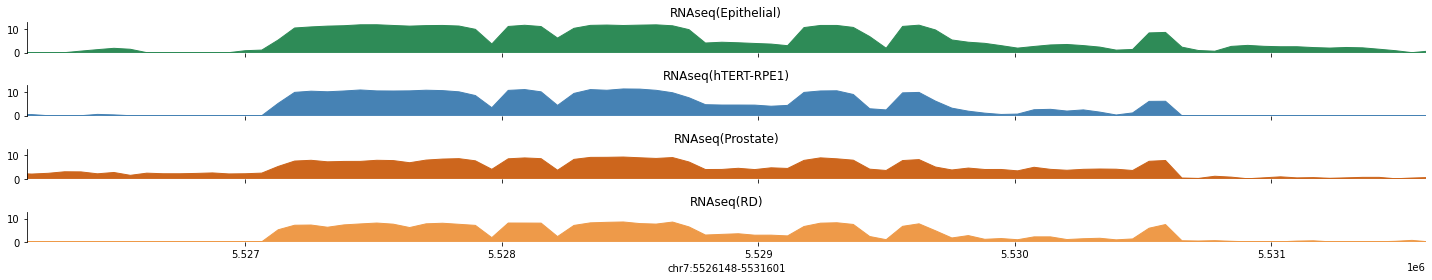

In [22]:
# 定义每个轨道对应的颜色
colors = {'RNAseq(Epithelial)': '#2E8B57',
          'RNAseq(hTERT-RPE1)': '#4682B4',
          'RNAseq(Prostate)': '#CD661D',
          'RNAseq(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 13)
        ax.set_xlim(5526148, 5531601)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr7:5526148-5531601")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/FigS4/ACTB_rna.scaled.pdf')
plot_tracks(tracks, target_interval, height=1)

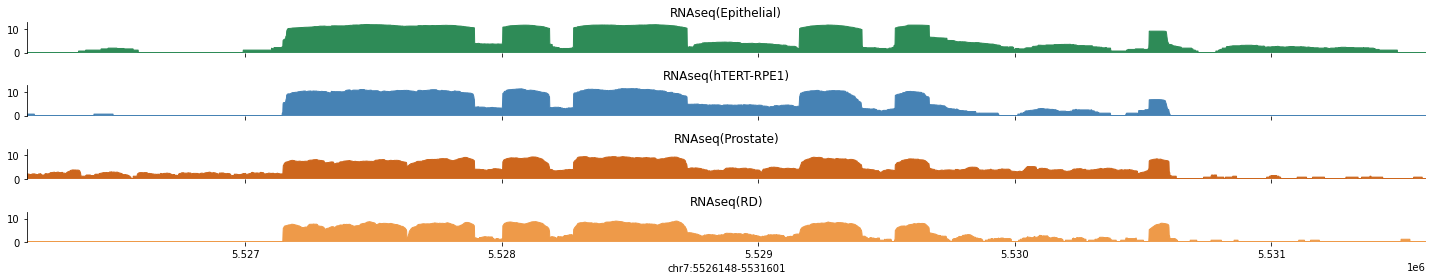

In [36]:
# 定义每个轨道对应的颜色
colors = {'RNAseq(Epithelial)': '#2E8B57',
          'RNAseq(hTERT-RPE1)': '#4682B4',
          'RNAseq(Prostate)': '#CD661D',
          'RNAseq(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 13)
        ax.set_xlim(5526148, 5531601)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr7:5526148-5531601")
    plt.tight_layout()
    #plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/FigS4/ACTB_rna.pdf')
plot_tracks(tracks, target_interval, height=1)

Initializing TransModel
Pearson(hTERT-RPE1): 
0.9752187026271257
Pearson(Prostate): 
0.9697441542924132
Pearson(RD): 
0.9593571449907172


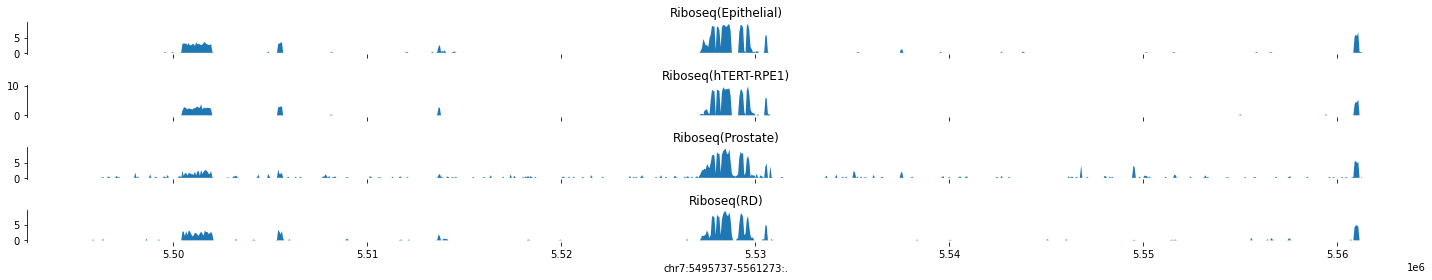

In [23]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

ribo_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/output_features/riboseq.bw'
ribo_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/output_features/riboseq.bw'
ribo_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/output_features/riboseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'ACTB'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()

#rna = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).cpu().numpy()
gt1 = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file_t1)[0]).cpu().numpy()
gt2 = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file_t2)[0]).cpu().numpy()
gt3 = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file_t3)[0]).cpu().numpy()

#
tracks = {'Riboseq(Epithelial)': gt,          
          'Riboseq(hTERT-RPE1)': gt2,
          'Riboseq(Prostate)': gt1,
          'Riboseq(RD)': gt3,
          }

plot_tracks(tracks, target_interval, height=1) #

idx_start = int(math.floor(gene_interval.start - target_interval.start)/64)
idx_end = int(math.ceil(gene_interval.end - target_interval.start)/64)

correlation1, p_value1 = pearsonr(gt1[idx_start:idx_end],gt[idx_start:idx_end])
correlation2, p_value2 = pearsonr(gt2[idx_start:idx_end],gt[idx_start:idx_end])
correlation3, p_value3 = pearsonr(gt3[idx_start:idx_end],gt[idx_start:idx_end])
#print('Pearson(Epithelial): ')
#print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

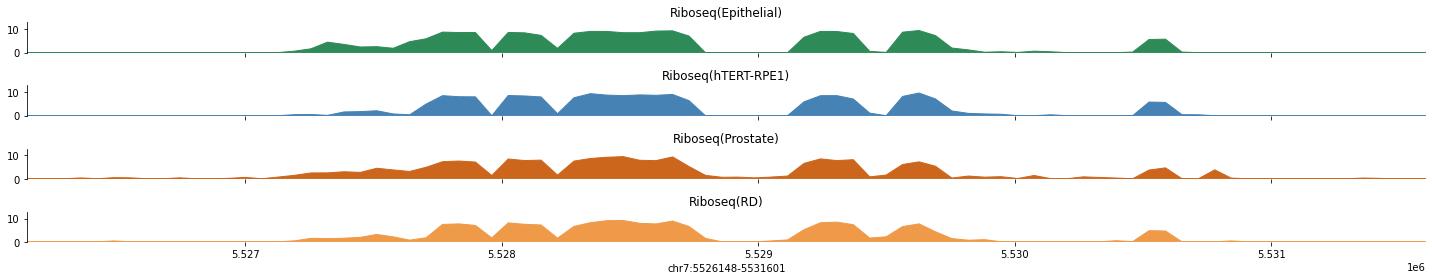

In [24]:
# 定义每个轨道对应的颜色
colors = {'Riboseq(Epithelial)': '#2E8B57',
          'Riboseq(hTERT-RPE1)': '#4682B4',
          'Riboseq(Prostate)': '#CD661D',
          'Riboseq(RD)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 13)
        ax.set_xlim(5526148, 5531601)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr7:5526148-5531601")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/FigS4/ACTB_riboseq.pdf')
plot_tracks(tracks, target_interval, height=1)

Initializing TransModel
Pearson(Epithelial): 
0.8092241863502972
Pearson(hTERT-RPE1): 
0.8071444008997322
Pearson(Prostate): 
0.7770112989212327
Pearson(RD): 
0.7438759547008622


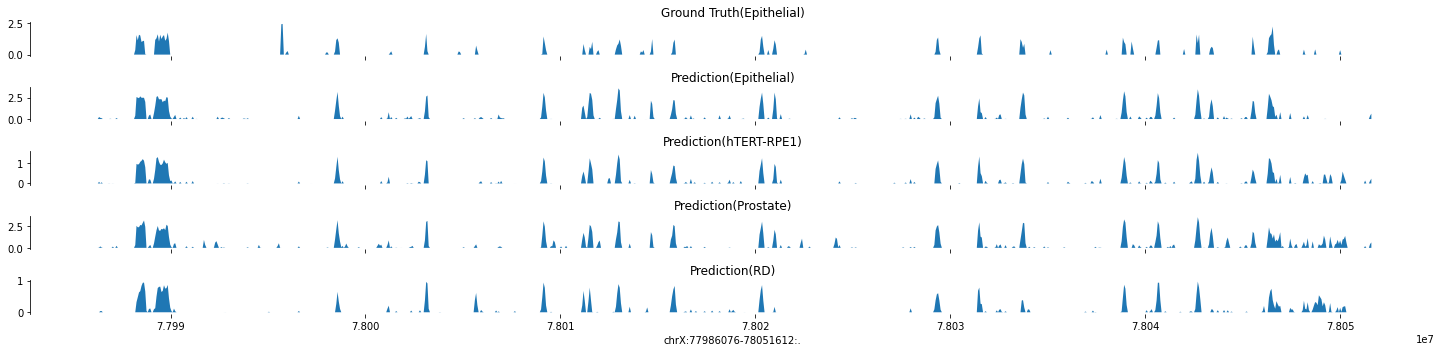

In [3]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/Epithelial/GSE200097/output_features/riboseq.bw'
rna_bw_file_t1 = '/data/slurm/hejl/riboseq/data/hg38/Prostate/GSE130465/input_features/rnaseq.bw'
rna_bw_file_t2 = '/data/slurm/hejl/riboseq/data/hg38/hTERT-RPE1/GSE138533/input_features/rnaseq.bw'
rna_bw_file_t3 = '/data/slurm/hejl/riboseq/data/hg38/RD/GSE103308/input_features/rnaseq.bw'

#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/mean.sorted.bw'
#rna_bw_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/mean.sorted.bw'

gene_name = 'PGK1'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

epi_t1 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t1)[0]).unsqueeze(1).to(device)
reference_input_t1 = torch.cat([ref_emb, epi_t1], dim = 1).unsqueeze(0)
pred_t1 = model(reference_input_t1)[0].detach().cpu().numpy()

epi_t2 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t2)[0]).unsqueeze(1).to(device)
reference_input_t2 = torch.cat([ref_emb, epi_t2], dim = 1).unsqueeze(0)
pred_t2 = model(reference_input_t2)[0].detach().cpu().numpy()

epi_t3 = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file_t3)[0]).unsqueeze(1).to(device)
reference_input_t3 = torch.cat([ref_emb, epi_t3], dim = 1).unsqueeze(0)
pred_t3 = model(reference_input_t3)[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth(Epithelial)': gt,
          'Prediction(Epithelial)': pred,          
          'Prediction(hTERT-RPE1)': pred_t2,
          'Prediction(Prostate)': pred_t1,
          'Prediction(RD)': pred_t3,
          }

plot_tracks(tracks, target_interval, height=1) #

correlation, p_value = pearsonr(pred,gt)
correlation1, p_value1 = pearsonr(pred_t1,gt)
correlation2, p_value2 = pearsonr(pred_t2,gt)
correlation3, p_value3 = pearsonr(pred_t3,gt)
print('Pearson(Epithelial): ')
print(correlation)
print('Pearson(hTERT-RPE1): ')
print(correlation2)
print('Pearson(Prostate): ')
print(correlation1)
print('Pearson(RD): ')
print(correlation3)

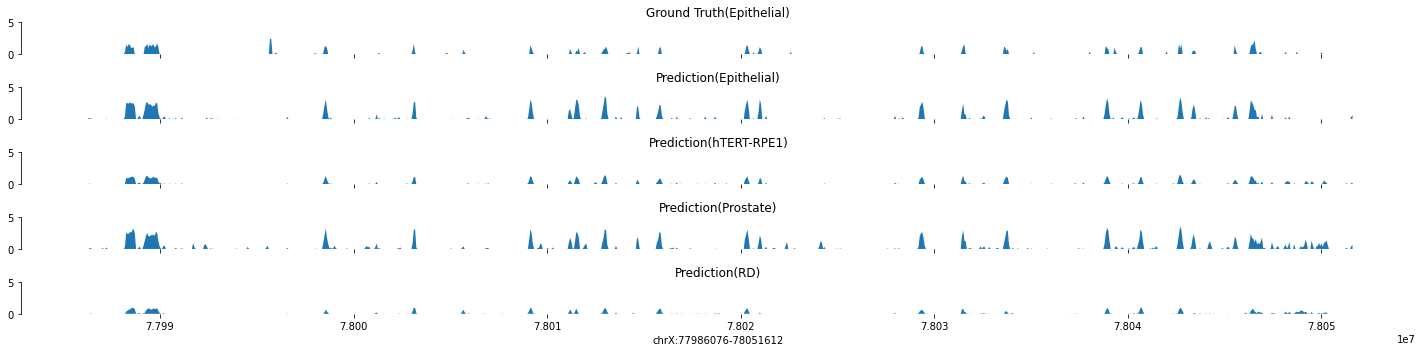

In [5]:
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        ax.set_ylim(0, 5)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chrX:77986076-78051612")
    plt.tight_layout()
    #plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/FigS4/PGK1.pdf')
plot_tracks(tracks, target_interval, height=1)

##

Initializing TransModel
Initializing TransModel
Pearson: 
0.9084663210437747
Pearson(woseq_model): 
0.7744776105909716
Pearson(woseq): 
0.5128621049294875


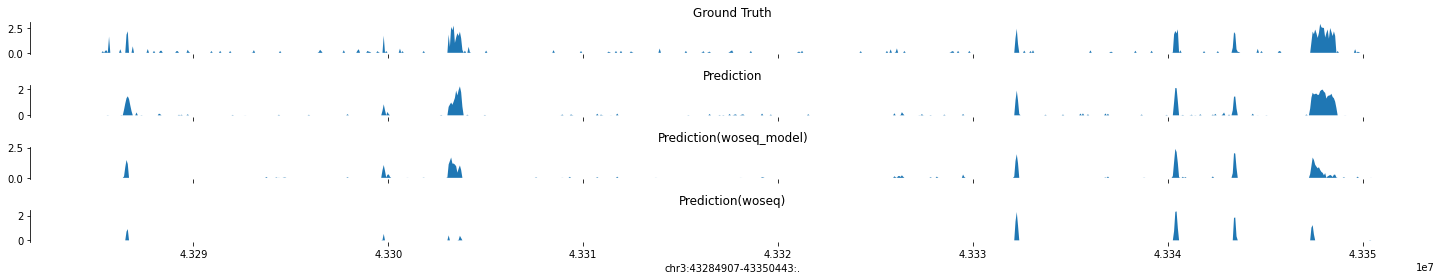

In [192]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

woseq_checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_20230905_h512_l12_lr1e-5_wo_seq/models/epoch=36-step=708587.ckpt'
woseq_model = TrainModule.load_from_checkpoint(woseq_checkpoint).to(device)
woseq_model = woseq_model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/neuron/GSE90469_2/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/neuron/GSE90469_2/output_features/riboseq.bw'

gene_name = 'SNRK'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

pred_woseq =  model(torch.cat([torch.zeros_like(ref_emb), epi], dim = 1).unsqueeze(0))[0].detach().cpu().numpy()

pred_woseq_model =  woseq_model(torch.cat([torch.zeros_like(ref_emb), epi], dim = 1).unsqueeze(0))[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth': gt,
          'Prediction': pred,
          'Prediction(woseq_model)': pred_woseq_model,
          'Prediction(woseq)': pred_woseq
          }

plot_tracks(tracks, target_interval, height=1) #

correlation, p_value = pearsonr(pred,gt)
correlation1, p_value1 = pearsonr(pred_woseq,gt)
correlation2, p_value1 = pearsonr(pred_woseq_model,gt)


print('Pearson: ')
print(correlation)
print('Pearson(woseq_model): ')
print(correlation2)
print('Pearson(woseq): ')
print(correlation1)



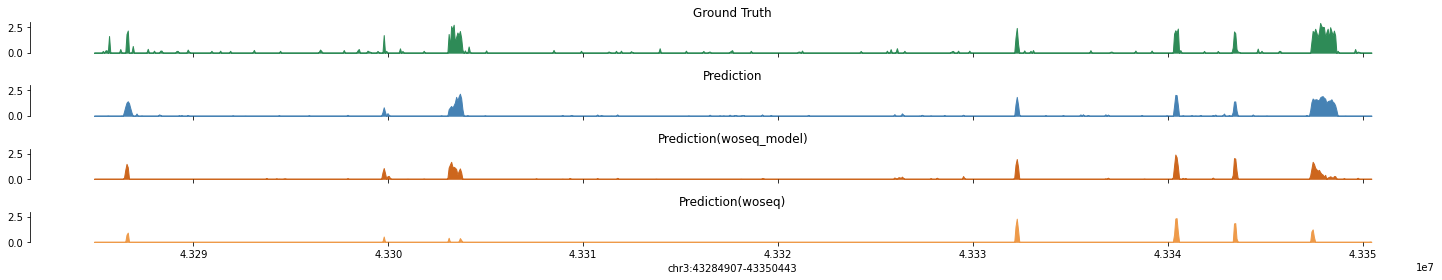

In [196]:
# 定义每个轨道对应的颜色
colors = {'Ground Truth': '#2E8B57',
          'Prediction': '#4682B4',
          'Prediction(woseq_model)': '#CD661D',
          'Prediction(woseq)': '#EE9A49'}
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        ax.set_ylim(0, 3)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr3:43284907-43350443")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig2/SNRK.pdf')
plot_tracks(tracks, target_interval, height=1)

Initializing TransModel
Initializing TransModel
Pearson(rnaseq): 
0.40796794894967353
Pearson: 
0.7793697934033034
Pearson(woseq_model): 
0.7044251052953869
Pearson(woseq): 
0.40846116653675435


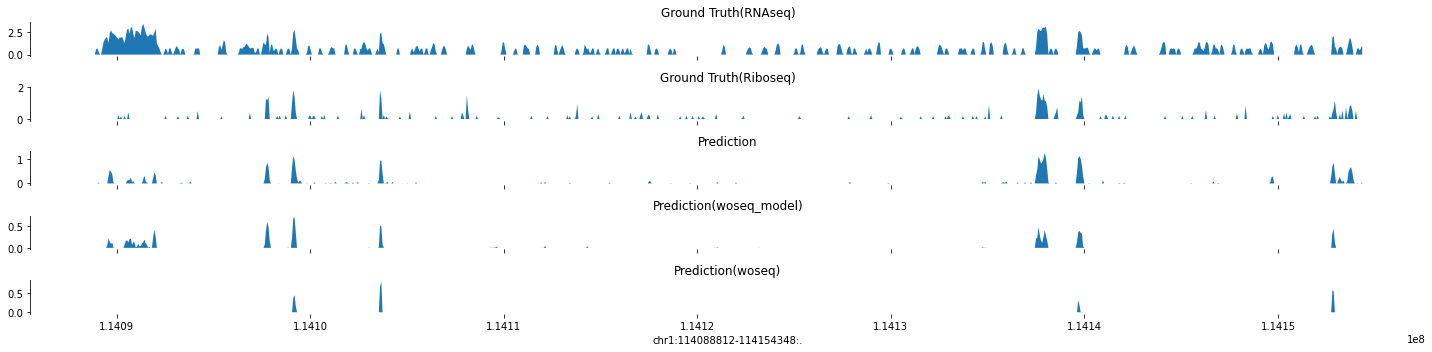

In [2]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_cds_interval(gff_df, gene_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[5].str.split('=').str[1] == gene_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'start': row[3], 'end': row[4], 'name':row[8].split(';')[7].split('=')[1], 
                                                      'cds_intervals': []} for _, row in gff_df.iterrows() if row[2] == 'transcript'}
    cds_df = gff_df[gff_df[2] == 'CDS']
    for _, row in cds_df.iterrows():
        gene_name = row[8].split(';')[3].split('=')[1]
        gene_dict[gene_name]['cds_intervals'].append((row[3], row[4]))
    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        cds_intervals = target_gene['cds_intervals']
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['start'],
            'gene_end': target_gene['end'],
            'cds_intervals': cds_intervals,
            'gene_name': target_gene['name']
        }
    
def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

woseq_checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_20230905_h512_l12_lr1e-5_wo_seq/models/epoch=36-step=708587.ckpt'
woseq_model = TrainModule.load_from_checkpoint(woseq_checkpoint).to(device)
woseq_model = woseq_model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/neuron/GSE90469_2/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/neuron/GSE90469_2/output_features/riboseq.bw'

gene_name = 'SYT6'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_cds_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

pred_woseq =  model(torch.cat([torch.zeros_like(ref_emb), epi], dim = 1).unsqueeze(0))[0].detach().cpu().numpy()

pred_woseq_model =  woseq_model(torch.cat([torch.zeros_like(ref_emb), epi], dim = 1).unsqueeze(0))[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
rna = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth(RNAseq)': rna,
          'Ground Truth(Riboseq)': gt,
          'Prediction': pred,
          'Prediction(woseq_model)': pred_woseq_model,
          'Prediction(woseq)': pred_woseq
          }

plot_tracks(tracks, target_interval, height=1) #

correlation_rna, p_value_rna = pearsonr(rna,gt)
correlation, p_value = pearsonr(pred,gt)
correlation1, p_value1 = pearsonr(pred_woseq,gt)
correlation2, p_value1 = pearsonr(pred_woseq_model,gt)

print('Pearson(rnaseq): ')
print(correlation_rna)
print('Pearson: ')
print(correlation)
print('Pearson(woseq_model): ')
print(correlation2)
print('Pearson(woseq): ')
print(correlation1)



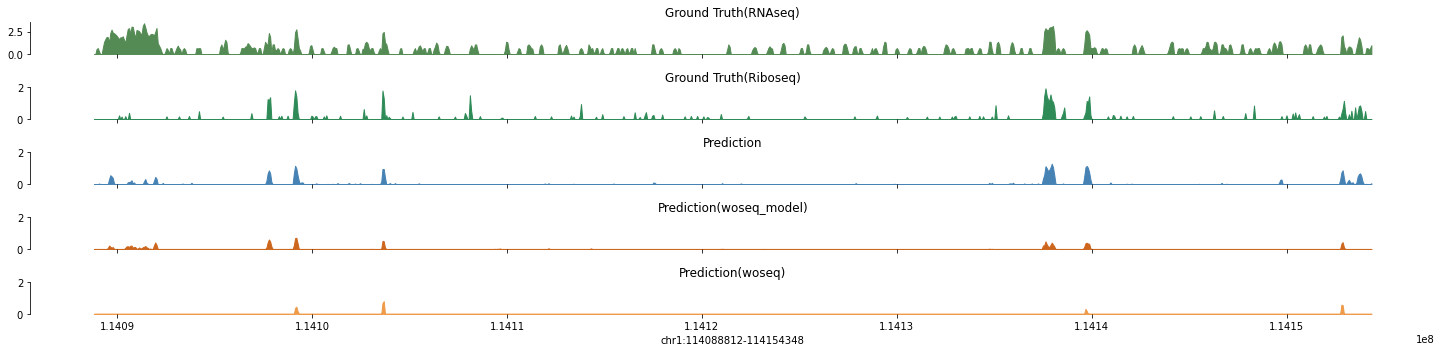

In [4]:
# 定义每个轨道对应的颜色
colors = {'Ground Truth(RNAseq)': '#548B54',
          'Ground Truth(Riboseq)': '#2E8B57',
          'Prediction': '#4682B4',
          'Prediction(woseq_model)': '#CD661D',
          'Prediction(woseq)': '#EE9A49'
         }
def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    ylims = [(0, 3.5), (0, 2),(0, 2),(0, 2),(0, 2)]
    for ax, (title, y), ylim in zip(axes, tracks.items(),ylims):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y, color=colors[title])
        ax.set_title(title)
        #ax.set_ylim(0, 2)
        ax.set_ylim(ylim)
        #ax.set_xlim(114088812, 114154348)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel("chr1:114088812-114154348")
    plt.tight_layout()
    plt.savefig('/data/slurm/hejl/riboseq/Translatomer/results/Fig2/SYT6.final.pdf')
plot_tracks(tracks, target_interval, height=1)

Initializing TransModel
Initializing TransModel
{'chrom': 'chr17', 'gene_start': 39200283, 'gene_end': 39204840, 'gene_name': 'RPL19-208'}
Pearson(rnaseq): 
0.6412643044212394
Pearson: 
0.9114475023260955
Pearson(woseq_model): 
0.8445183065199601
Pearson(woseq): 
0.8064544369396796


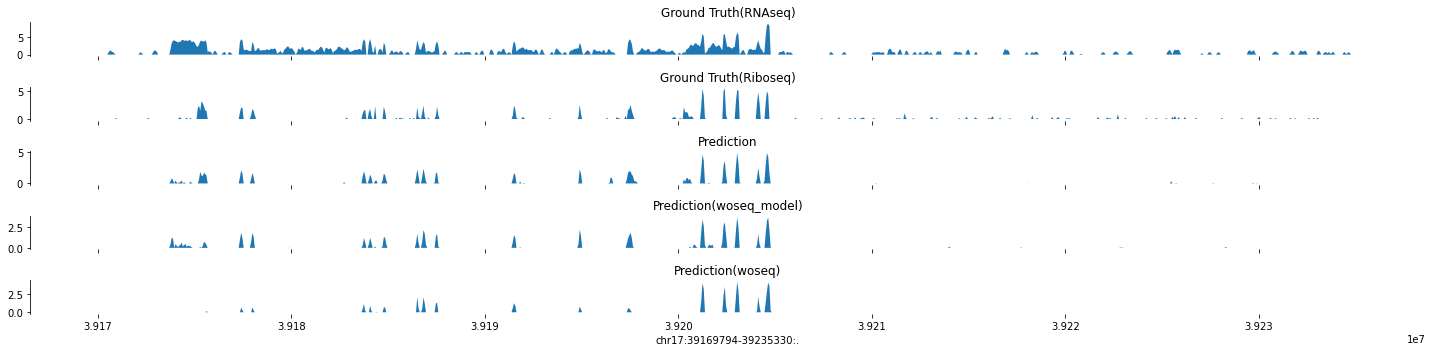

In [6]:
import kipoiseq
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from train import TrainModule, FastaStringExtractor

import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig
from kipoiseq import Interval
import math
import random
from scipy.stats import pearsonr

random.seed(2077)
SEQUENCE_LENGTH = 65536

def one_hot_encode(sequence):
    #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
    #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
    en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
    en_seq = [en_dict[ch] for ch in sequence]
    np_seq = np.array(en_seq, dtype = int)
    seq_emb = np.zeros((len(np_seq), 5))
    seq_emb[np.arange(len(np_seq)), np_seq] = 1
    #seq_emb = np.eye(5)[np_seq]
    return seq_emb.astype(np.float32)

def plot_tracks(tracks, interval, height=1.5):
    fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
    for ax, (title, y) in zip(axes, tracks.items()):
        ax.fill_between(np.linspace(interval.start, interval.end, num=len(y)), y)
        ax.set_title(title)
        sns.despine(top=True, right=True, bottom=True)
    ax.set_xlabel(str(interval))
    plt.tight_layout()
    
def variant_generator(vcf_file):
    with open(vcf_file) as f:
        for line in f:
            chrom, pos, id, ref, alt = line.split('\t')[:5]
            
      # Split ALT alleles and return individual variants as output.
            yield kipoiseq.Variant(chrom=chrom, pos=pos,ref=ref, alt=alt, id=id)
        
def get_interval(gff_df, tx_name):
    # filter by gene_name
    gff_df = gff_df[gff_df[8].str.split(';').str[7].str.split('=').str[1] == tx_name]

    # generate dict
    gene_dict = {row[8].split(';')[0].split('=')[1]: {'chrom': row[0],'txstart': row[3], 'txend': row[4], 'txname':row[8].split(';')[7].split('=')[1], 
                                                      } for _, row in gff_df.iterrows() if row[2] == 'transcript'}

    target_gene = next((gene_info for gene_info in gene_dict.values()
                      ), None)
    if target_gene:
        return {
            'chrom': target_gene['chrom'],
            'gene_start': target_gene['txstart'],
            'gene_end': target_gene['txend'],
            'gene_name': target_gene['txname']
        }

def generate_inputs(region, fasta_file, bw_file, region_len=SEQUENCE_LENGTH):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                                )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    target.append(arr)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target

def generate_outputs(region, fasta_file, bw_file, nBins=1024, region_len=65536):
    bw = pyBigWig.open(bw_file)
    target = []
    chrom = region.chrom
    start = region.start
    end = region.end
    chromosome_length = bw.chroms(chrom)
    interval = Interval(chrom, start, end).resize(region_len)
    trimmed_interval = Interval(interval.chrom,
                                max(interval.start, 0),
                                min(interval.end, chromosome_length),
                               )
    signals = np.array(bw.values(chrom, trimmed_interval.start, trimmed_interval.end)).astype(np.float32).tolist()
    pad_upstream = np.array([0] * max(-interval.start, 0)).astype(np.float32).tolist()
    pad_downstream = np.array([0] * max(interval.end - chromosome_length, 0)).astype(np.float32).tolist()
    tmp = pad_upstream + signals + pad_downstream
    arr = np.array(tmp).astype(np.float32)
    reshaped_arr = arr.reshape(-1, 64)
    averages = np.mean(reshaped_arr, axis=1)
    target.append(averages)

    target = np.array(target).astype(np.float32)
    target = np.nan_to_num(target,0)
    target = np.log(target + 1)
    bw.close()
    return target




device = 'cuda:0'
checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_h512_l12_lr1e-5/models/epoch=38-step=746889.ckpt'
model = TrainModule.load_from_checkpoint(checkpoint).to(device)
model = model.eval()

woseq_checkpoint = '/data/slurm/hejl/riboseq/results_DNA/bigmodel/bigmodel_20230905_h512_l12_lr1e-5_wo_seq/models/epoch=36-step=708587.ckpt'
woseq_model = TrainModule.load_from_checkpoint(woseq_checkpoint).to(device)
woseq_model = woseq_model.eval()

#GTF_FILE = '/data/slurm/leixiong/m6A_prediction/data/gencode.v42.chr_patch_hapl_scaff.annotation.gtf.gz'
SEQUENCE_LENGTH = 65536
fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'#str(DATA_PATH / 'hg38.fa')
fasta_extractor = FastaStringExtractor(fasta_file)
gff_file = '/data/slurm/hejl/riboseq/gencode.v43.annotation.gff3'
#rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/K562/GSE153597/input_features/rnaseq.bw'
rna_bw_file = '/data/slurm/hejl/riboseq/data/hg38/neuron/GSE90469_2/input_features/rnaseq.bw'
ribo_bw_file = '/data/slurm/hejl/riboseq/data/hg38/neuron/GSE90469_2/output_features/riboseq.bw'

gene_name = 'RPL19-208'
#gene_name = 'KRT19'

gff_df = pd.read_csv(gff_file, sep='\t', comment='#', header=None)
gene_info = get_interval(gff_df, gene_name)

gene_interval =kipoiseq.Interval(gene_info['chrom'], gene_info['gene_start'], gene_info['gene_end'])
region_interval = gene_interval
target_interval = Interval(region_interval.chrom, region_interval.start, region_interval.end).resize(SEQUENCE_LENGTH)
ref_seq = fasta_extractor.extract(target_interval)
ref_emb = torch.Tensor(one_hot_encode(ref_seq)).to(device)

epi = torch.Tensor(generate_inputs(region_interval, fasta_file, rna_bw_file)[0]).unsqueeze(1).to(device)
reference_input = torch.cat([ref_emb, epi], dim = 1).unsqueeze(0)
pred = model(reference_input)[0].detach().cpu().numpy()

pred_woseq =  model(torch.cat([torch.zeros_like(ref_emb), epi], dim = 1).unsqueeze(0))[0].detach().cpu().numpy()

pred_woseq_model =  woseq_model(torch.cat([torch.zeros_like(ref_emb), epi], dim = 1).unsqueeze(0))[0].detach().cpu().numpy()


gt = torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).cpu().numpy()
rna = torch.Tensor(generate_outputs(region_interval, fasta_file, rna_bw_file)[0]).cpu().numpy()
#
tracks = {'Ground Truth(RNAseq)': rna,
          'Ground Truth(Riboseq)': gt,
          'Prediction': pred,
          'Prediction(woseq_model)': pred_woseq_model,
          'Prediction(woseq)': pred_woseq
          }

plot_tracks(tracks, target_interval, height=1) #

correlation_rna, p_value_rna = pearsonr(rna,gt)
correlation, p_value = pearsonr(pred,gt)
correlation1, p_value1 = pearsonr(pred_woseq,gt)
correlation2, p_value1 = pearsonr(pred_woseq_model,gt)

print(gene_info)
print('Pearson(rnaseq): ')
print(correlation_rna)
print('Pearson: ')
print(correlation)
print('Pearson(woseq_model): ')
print(correlation2)
print('Pearson(woseq): ')
print(correlation1)



Interval(chrom='chr17', start=16348650, end=16414186, name='', strand='.', ...)

In [193]:
gene_interval

Interval(chrom='chr3', start=43286512, end=43348838, name='', strand='.', ...)

In [194]:
region_interval

Interval(chrom='chr3', start=43286512, end=43348838, name='', strand='.', ...)

In [195]:
target_interval

Interval(chrom='chr3', start=43284907, end=43350443, name='', strand='.', ...)

In [ ]:
gt = 
#torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0]).unsqueeze(1).to(device)

In [39]:
torch.Tensor(generate_outputs(region_interval, fasta_file, ribo_bw_file)[0])

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [126]:
pred[200:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17348309,
       0.        , 0.0710221 , 0.        , 0.        , 0.52360046,
       0.9845609 , 0.        , 0.5019351 , 0.69132346, 0.7312834 ,
       1.2309089 , 2.6537948 , 4.0967903 , 3.8991396 , 3.2421317 ,
       0.4156521 , 0.        , 0.4989311 , 0.32817495, 0.31863204,
       0.        , 0.33910593, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06526171, 0.        ,
       0.        , 0.        , 0.3718287 , 0.36960337, 0.14378451,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.65713674, 3.1593976 , 4.2717133 ,
       4.622581  , 4.267431  , 2.707113  , 1.0621324 , 0.43186393,
       0.07588875, 0.09589497, 0.        , 0.        , 0.     

In [127]:
gt[200:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.108975  ,
       1.1394343 , 0.15860504, 0.6613985 , 0.        , 0.        ,
       0.9944085 , 2.7347732 , 3.700916  , 4.135916  , 4.174628  ,
       0.06062462, 0.        , 0.        , 0.25995752, 0.23556606,
       0.3409266 , 0.42608434, 0.        , 0.        , 0.        ,
       0.        , 0.35197642, 0.04580954, 0.        , 0.        ,
       0.        , 0.3844117 , 0.        , 0.56850475, 0.15860504,
       0.        , 0.        , 0.3844117 , 0.        , 0.30702505,
       0.        , 0.        , 0.        , 3.8959572 , 3.9834712 ,
       4.319361  , 4.2707896 , 3.0910425 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [118]:
output_features = torch.load("/data/slurm/hejl/riboseq/Translatomer/data/hg38/Epithelial/GSE200097/output_features/tmp/Epithelial_65536_1024_log_24chr_riboseq.pt")

In [128]:
output_features[10][200:300]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.1394, 1.1141, 0.1452,
        0.6614, 0.0000, 0.0000, 1.0059, 2.7755, 3.7124, 4.1369, 4.1562, 0.0458,
        0.0000, 0.0000, 0.2719, 0.2231, 0.3409, 0.4261, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3629, 0.0308, 0.0000, 0.0000, 0.0155, 0.3737, 0.0000, 0.5860,
        0.1316, 0.0000, 0.0000, 0.3844, 0.0000, 0.3070, 0.0000, 0.0000, 0.0000,
        3.9192, 3.9794, 4.3283, 4.2714, 3.0128, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.1452, 0.3185, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [25]:
from pyfaidx import Fasta
import csv

fasta_file = '/data/slurm/hejl/riboseq/data/hg38/hg38.fa'
bed_file = '/data/slurm/hejl/riboseq/mutation/start_codon_unique.bed'
# 读取fasta文件
fasta = Fasta(fasta_file)
kozak_pos = []

with open(bed_file, 'r') as file:
    for line in file:
        chrom, start, end = line.strip().split('\t')
        start = int(start)
        end = int(end)

        # 获取start_codon的序列
        sequence = fasta[chrom][start-4:end+1].seq
        if len(sequence)!=7:
            continue
        if sequence[3:6]!='ATG':
            continue
        kozak_pos.append((chrom, start-11, end+10))
            
output_file = '/data/slurm/hejl/riboseq/kozak_region.bed'            
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    for site in kozak_pos:
        writer.writerow(site)

In [26]:
with open('/data/slurm/hejl/riboseq/Kozak_sequences.5000.fa', 'r') as fasta_file:
    fasta_lines = fasta_file.readlines()

# 处理fasta序列
modified_fasta = []
for line in fasta_lines:
    if line.startswith('>'):  # 处理序列标识行
        modified_fasta.append(line)
    else:  # 处理序列行
        sequence = line.strip()
        if len(sequence) >= 13:  # 检查序列长度
            modified_sequence = sequence[:10] + '---' + sequence[13:]
            modified_fasta.append(modified_sequence + '\n')
        else:
            modified_fasta.append(sequence + '\n')

# 保存修改后的fasta序列
with open('/data/slurm/hejl/riboseq/Kozak_sequences.5000.rmATG.fa', 'w') as output_file:
    output_file.writelines(modified_fasta)

In [27]:
with open('/data/slurm/hejl/riboseq/Kozak_sequences.t5000.fa', 'r') as fasta_file:
    fasta_lines = fasta_file.readlines()

# 处理fasta序列
modified_fasta = []
for line in fasta_lines:
    if line.startswith('>'):  # 处理序列标识行
        modified_fasta.append(line)
    else:  # 处理序列行
        sequence = line.strip()
        if len(sequence) >= 13:  # 检查序列长度
            modified_sequence = sequence[:10] + '---' + sequence[13:]
            modified_fasta.append(modified_sequence + '\n')
        else:
            modified_fasta.append(sequence + '\n')

# 保存修改后的fasta序列
with open('/data/slurm/hejl/riboseq/Kozak_sequences.t5000.rmATG.fa', 'w') as output_file:
    output_file.writelines(modified_fasta)

In [172]:
with open('/data/slurm/hejl/riboseq/Kozak_sequences.10000.no_headers.fa', 'r') as fasta_file:
    fasta_lines = fasta_file.readlines()

# 处理fasta序列
modified_fasta = []
for line in fasta_lines:
    sequence = line.strip()
    if len(sequence) >= 13:  # 
        modified_sequence = sequence[:10] + '---' + sequence[13:]
        modified_fasta.append(modified_sequence + '\n')
    else:
        modified_fasta.append(sequence + '\n')

# 保存修改后的fasta序列
with open('/data/slurm/hejl/riboseq/Kozak_sequences.10000.no_headers.rmATG.fa', 'w') as output_file:
    output_file.writelines(modified_fasta)

In [186]:
gene_name_file = '/data/slurm/hejl/riboseq/Translatomer/data/hg38/gene_name.mini.txt'

def gene_generator(gene_name_file):
    with open(gene_name_file) as f:
        for line in f:
            gene = line
            yield gene
for gene_name in gene_generator(gene_name_file):
    print(gene_name)

OR4F5

OR4F29

OR4F16

SAMD11

NOC2L

KLHL17

PLEKHN1

PERM1

HES4

ISG15



In [194]:
from scipy.stats import pearsonr

a = [0, 0, 0]
b = [0, 0, 0]

corr, p = pearsonr(a + [1e-8], b + [1e-8])
print(corr)

1.0


In [209]:
model

TrainModule(
  (model): TransModel(
    (conv1): Sequential(
      (0): Conv1d(6, 512, kernel_size=(129,), stride=(128,), padding=(64,))
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (attn): AttnModule(
      (pos_encoder): PositionalEncoding(
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (module): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
            )
            (linear1): Linear(in_features=512, out_features=512, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=512, out_features=512, bias=True)
            (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        

In [5]:
    import numpy as np
    def one_hot_encode(sequence):
        #return kipoiseq.transforms.functional.one_hot_dna(sequence, alphabet=('A', 'C', 'G', 'T'),).astype(np.float32)
        #en_dict = {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3, 'N' : 4}
        en_dict = {'A' : 0, 'T' : 1, 'C' : 2, 'G' : 3, 'N' : 4}
        en_seq = [en_dict[ch] for ch in sequence]
        np_seq = np.array(en_seq, dtype = int)
        seq_emb = np.zeros((len(np_seq), 5))
        seq_emb[np.arange(len(np_seq)), np_seq] = 1
        return seq_emb.astype(np.float32)

In [9]:
one_hot_encode('G')

array([[0., 0., 0., 1., 0.]], dtype=float32)